# アミノ酸配列のグラフ表示画像のTransformerによるタンパク質ファミリー分類（5分割交差検証）

## 1. 画像とラベルの対応を取る `Dataset` を作成

In [1]:
from torch.utils.data import Dataset
from PIL import Image

import os

label2id = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4}
id2label = {v: k for k, v in label2id.items()}

class GPCRImageDataset(Dataset):
    def __init__(self, csv_path, img_dir, transform=None):
        self.data = pd.read_csv(csv_path, header=None, names=["num", "label", "accession"])
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = os.path.join(self.img_dir, f"{row['num']}.png")
        image = Image.open(img_path).convert("RGB")
        label = label2id[row["label"]]

        if self.transform:
            image = self.transform(image)

        return {
            "pixel_values": image,
            "label": label
        }

## 2. 画像前処理（ViT用）

In [2]:
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
# from transformers import AutoImageProcessor
from transformers import ViTImageProcessorFast, ViTForImageClassification

processor = ViTImageProcessorFast.from_pretrained("google/vit-base-patch16-224-in21k")
transform = Compose([
    Resize((224, 224)),
    ToTensor(),
    Normalize(mean=processor.image_mean, std=processor.image_std)
])

## 3. `Trainer` を使って学習

[Fold 1 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ArchWizard7\AppData\Local\Temp\ipykernel_57324\3512132755.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.222602,0.941024,0.938303
2,No log,0.179466,0.953986,0.951746
3,0.233500,0.168742,0.957226,0.955426
4,0.233500,0.135701,0.970188,0.969458
5,0.233500,0.144693,0.967596,0.966635
6,0.055600,0.142544,0.970188,0.969801
7,0.055600,0.162592,0.966948,0.966331
8,0.021500,0.152280,0.969540,0.969050
9,0.021500,0.156139,0.969540,0.969049
10,0.021500,0.156488,0.971484,0.971042


Fold 2 F1 Score: 0.9710
Confusion Matrix:
 [[1047    3   15    0    0]
 [   9   84    3    0    0]
 [  11    0  364    1    0]
 [   0    0    2    0    0]
 [   0    0    0    0    4]]
              precision    recall  f1-score      support
A              0.981256  0.983099  0.982176  1065.000000
B              0.965517  0.875000  0.918033    96.000000
C              0.947917  0.968085  0.957895   376.000000
D              0.000000  0.000000  0.000000     2.000000
E              1.000000  1.000000  1.000000     4.000000
accuracy       0.971484  0.971484  0.971484     0.971484
macro avg      0.778938  0.765237  0.771621  1543.000000
weighted avg   0.970929  0.971484  0.971042  1543.000000


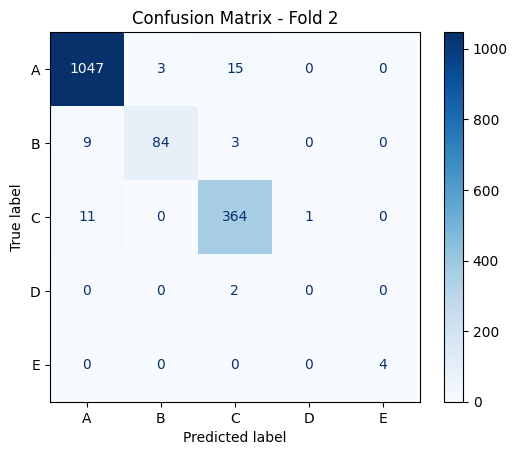

[Fold 3 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ArchWizard7\AppData\Local\Temp\ipykernel_57324\3512132755.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.222050,0.939728,0.936093
2,No log,0.181331,0.955282,0.952564
3,0.238400,0.172243,0.957226,0.954711
4,0.238400,0.175664,0.960467,0.957480
5,0.238400,0.163376,0.962411,0.963498
6,0.056700,0.154477,0.965651,0.967160
7,0.056700,0.169088,0.963059,0.964051
8,0.020100,0.164083,0.962411,0.963482
9,0.020100,0.167933,0.966299,0.967467
10,0.020100,0.171154,0.963707,0.964760


Fold 3 F1 Score: 0.9648
Confusion Matrix:
 [[1042    1   14    0    0]
 [   5   78   12    0    0]
 [  13    1  364    6    0]
 [   0    0    0    0    0]
 [   4    0    0    0    3]]
              precision    recall  f1-score      support
A              0.979323  0.985809  0.982555  1057.000000
B              0.975000  0.821053  0.891429    95.000000
C              0.933333  0.947917  0.940568   384.000000
D              0.000000  0.000000  0.000000     0.000000
E              1.000000  0.428571  0.600000     7.000000
accuracy       0.963707  0.963707  0.963707     0.963707
macro avg      0.777531  0.636670  0.682910  1543.000000
weighted avg   0.967706  0.963707  0.964760  1543.000000


E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


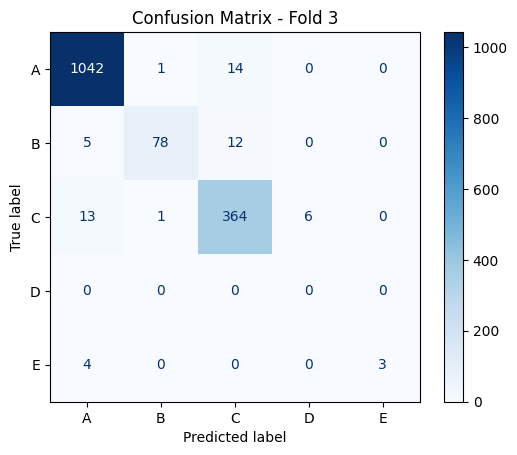

[Fold 4 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ArchWizard7\AppData\Local\Temp\ipykernel_57324\3512132755.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.278427,0.923526,0.918939
2,No log,0.173704,0.954634,0.952653
3,0.240300,0.157178,0.960467,0.958646
4,0.240300,0.165443,0.958522,0.956927
5,0.240300,0.162438,0.963707,0.962122
6,0.053600,0.183688,0.957874,0.957374
7,0.053600,0.180048,0.963059,0.962079
8,0.021000,0.192379,0.960467,0.959919
9,0.021000,0.190772,0.959819,0.959268
10,0.021000,0.191412,0.960467,0.959938


Fold 4 F1 Score: 0.9599
Confusion Matrix:
 [[1051    1   11    0    0]
 [   2   68    7    0    0]
 [  26    7  361    3    0]
 [   0    0    4    1    0]
 [   0    0    0    0    1]]
              precision    recall  f1-score      support
A              0.974050  0.988711  0.981326  1063.000000
B              0.894737  0.883117  0.888889    77.000000
C              0.942559  0.909320  0.925641   397.000000
D              0.250000  0.200000  0.222222     5.000000
E              1.000000  1.000000  1.000000     1.000000
accuracy       0.960467  0.960467  0.960467     0.960467
macro avg      0.812269  0.796230  0.803616  1543.000000
weighted avg   0.959660  0.960467  0.959938  1543.000000


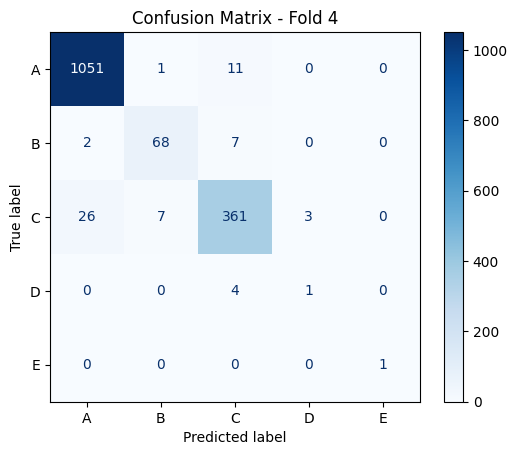

[Fold 5 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\ArchWizard7\AppData\Local\Temp\ipykernel_57324\3512132755.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.194869,0.954634,0.951695
2,No log,0.131025,0.968244,0.966308
3,0.236200,0.123039,0.966948,0.965107
4,0.236200,0.153913,0.964355,0.962454
5,0.236200,0.113099,0.972132,0.971250
6,0.057000,0.139341,0.964355,0.964396
7,0.057000,0.098493,0.978613,0.977473
8,0.023500,0.101293,0.975373,0.974345
9,0.023500,0.094990,0.977317,0.976259
10,0.023500,0.096293,0.977965,0.976908


Fold 5 F1 Score: 0.9769
Confusion Matrix:
 [[1050    3    8    0    0]
 [   2   80   10    0    0]
 [   7    1  376    0    0]
 [   0    0    3    0    0]
 [   0    0    0    0    3]]
              precision    recall  f1-score      support
A              0.991501  0.989632  0.990566  1061.000000
B              0.952381  0.869565  0.909091    92.000000
C              0.947103  0.979167  0.962868   384.000000
D              0.000000  0.000000  0.000000     3.000000
E              1.000000  1.000000  1.000000     3.000000
accuracy       0.977965  0.977965  0.977965     0.977965
macro avg      0.778197  0.767673  0.772505  1543.000000
weighted avg   0.976208  0.977965  0.976908  1543.000000


E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
E:\GR2025\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


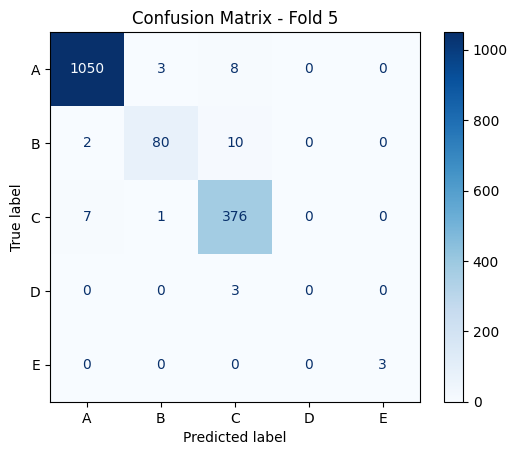


Average F1 Score: 0.9692644063655467
Confusion Matrix:
 [[5233   10   59    0    0]
 [  25  393   36    0    0]
 [  67   11 1841   10    0]
 [   0    0   12    1    0]
 [   4    0    0    0   14]]


In [4]:
from transformers import TrainingArguments, Trainer
import matplotlib.pyplot as plt
import numpy as np
import evaluate
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
from torch.utils.data import Subset
import pandas as pd

accuracy = evaluate.load("accuracy")

# 5分割交差検証の設定
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

dataset = GPCRImageDataset("../gpcr_labels.csv", "../graphs", transform=transform)

all_f1_scores = []
all_conf_matrices = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset)):
    print(f"\033[34m[Fold {fold+1} / 5]\033[0m")

    # Subset 作成
    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)

    # モデルを毎回初期化
    model = ViTForImageClassification.from_pretrained(
        "google/vit-base-patch16-224-in21k",
        num_labels=5,
        id2label=id2label,
        label2id=label2id
    )

    training_args = TrainingArguments(
        output_dir=f"./vit-gpcr-fold{fold}",
        per_device_train_batch_size=32,
        eval_strategy="epoch",
        save_strategy="epoch",
        num_train_epochs=10,
        logging_dir="./logs",
        report_to="none"
    )

    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        preds = np.argmax(logits, axis=-1)
        f1 = f1_score(labels, preds, average="weighted")
        return {
            "accuracy": accuracy.compute(predictions=preds, references=labels)["accuracy"],
            "f1": f1
        }

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=processor,
        compute_metrics=compute_metrics
    )

    trainer.train()

    # 推論 & 評価
    preds = trainer.predict(val_dataset)
    y_true = preds.label_ids
    y_pred = np.argmax(preds.predictions, axis=1)

    # ラベルIDのリストを明示的に渡す
    label_ids = list(range(len(label2id)))  # [0, 1, 2, 3, 4]
    display_names = list(label2id.keys())  # ["A", "B", "C", "D", "E"]

    f1 = f1_score(y_true, y_pred, average="weighted")
    cm = confusion_matrix(y_true, y_pred, labels=label_ids)

    report = classification_report(y_true, y_pred, target_names=display_names, output_dict=True)
    report_df = pd.DataFrame(report).T

    print(f"Fold {fold+1} F1 Score: \033[32m{f1:.4f}\033[0m")
    print("Confusion Matrix:\n", cm)
    print(report_df)

    all_f1_scores.append(f1)
    all_conf_matrices.append(cm)

    # 混同行列を可視化
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_names)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - Fold {fold+1}")
    plt.show()

# 最終結果をまとめる
print("\nAverage F1 Score:", np.mean(all_f1_scores))
print("Confusion Matrix:\n", sum(all_conf_matrices))